In [1]:
import torch
from hydra import compose, initialize

import wandb
from src.eval.visualize import visualize_dvinp_both
from src.utils.load_dvinp import load_dvinp

In [2]:
try:
    import torch_directml
    device = torch_directml.device() 
except ImportError:
    device = torch.device("cpu") 

In [3]:
# project = "cluster-sine"
# run = "magic-oath-9"

# dir = f"../models/{project}/{run}"

# api = wandb.Api()

# for s in ["dvinp.pth:v0", "optim.pth:v0", "cfg.yaml:v0"]:
#     artifact = api.artifact(f"{project}/{run}_{s}")
#     artifact.download(root=f"../models/{project}/{run}")

dir = f"../models/dis"

In [4]:
with initialize(version_base=None, config_path=dir):
    cfg = compose(config_name="cfg")

    dvinp, trainer, test_loader = load_dvinp(
        cfg=cfg, 
        device=device, 
        dir=dir, 
        load_decoder_only=False, 
        train_decoder=True
    ) 


Generating tasks: 100%|██████████| 4096/4096 [00:00<00:00, 270843.42it/s]
Dropped Escape call with ulEscapeCode : 0x03007703


In [5]:
trainer.wandb_logging = True
if trainer.wandb_logging:
    wandb.init(project="test") # "pretrained-decoder")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: max-burzer (max-burzer-karlsruhe-institute-of-technology). Use `wandb login --relogin` to force relogin


In [8]:
train = True

if train:
    # trainer.optimizer.param_groups[0]["lr"] = 0.1 * cfg.training.learning_rate
    # print(trainer.optimizer.param_groups[0]["lr"])

    num_epochs = 50
    losses = trainer.train(
        num_epochs=num_epochs,
        max_clip_norm=cfg.training.max_clip_norm,
        alpha=cfg.training.alpha,
        validate=True
    )

    # torch.save(dvinp.state_dict(), f"{dir}/dvinp.pth")

 50%|█████     | 16/32 [00:08<00:08,  1.94it/s, epoch=24, loss=168, lmpl=-154, mse=483]


ValueError: Expected parameter scale (Tensor of shape (128, 32, 2)) of distribution Normal(loc: torch.Size([128, 32, 2]), scale: torch.Size([128, 32, 2])) to satisfy the constraint GreaterThan(lower_bound=0.0), but found invalid values:
tensor([[[0.0479, 0.1044],
         [0.0132, 0.0157],
         [0.0243, 0.0415],
         ...,
         [0.0068, 0.0038],
         [0.0046, 0.0011],
         [0.0479, 0.1044]],

        [[0.0017, 0.0098],
         [0.0004, 0.0014],
         [0.0521, 0.1768],
         ...,
         [0.0023, 0.0135],
         [0.0005, 0.0020],
         [0.0017, 0.0098]],

        [[0.0293, 0.0540],
         [0.0039, 0.0011],
         [0.0136, 0.0180],
         ...,
         [0.0029, 0.0003],
         [0.0293, 0.0540],
         [0.0055, 0.0025]],

        ...,

        [[0.0630, 0.1360],
         [0.0262, 0.0432],
         [0.0171, 0.0198],
         ...,
         [0.0155, 0.0174],
         [0.0577, 0.1169],
         [0.0238, 0.0384]],

        [[0.0007, 0.0036],
         [0.0068, 0.0470],
         [0.0095, 0.0605],
         ...,
         [0.0018, 0.0111],
         [0.0028, 0.0192],
         [0.0272, 0.1282]],

        [[0.1990, 0.2795],
         [0.1669, 0.2635],
         [0.0004, 0.0021],
         ...,
         [0.0026, 0.0207],
         [0.0397, 0.1620],
         [0.0004, 0.0021]]], device='privateuseone:0', grad_fn=<SqrtBackward0>)

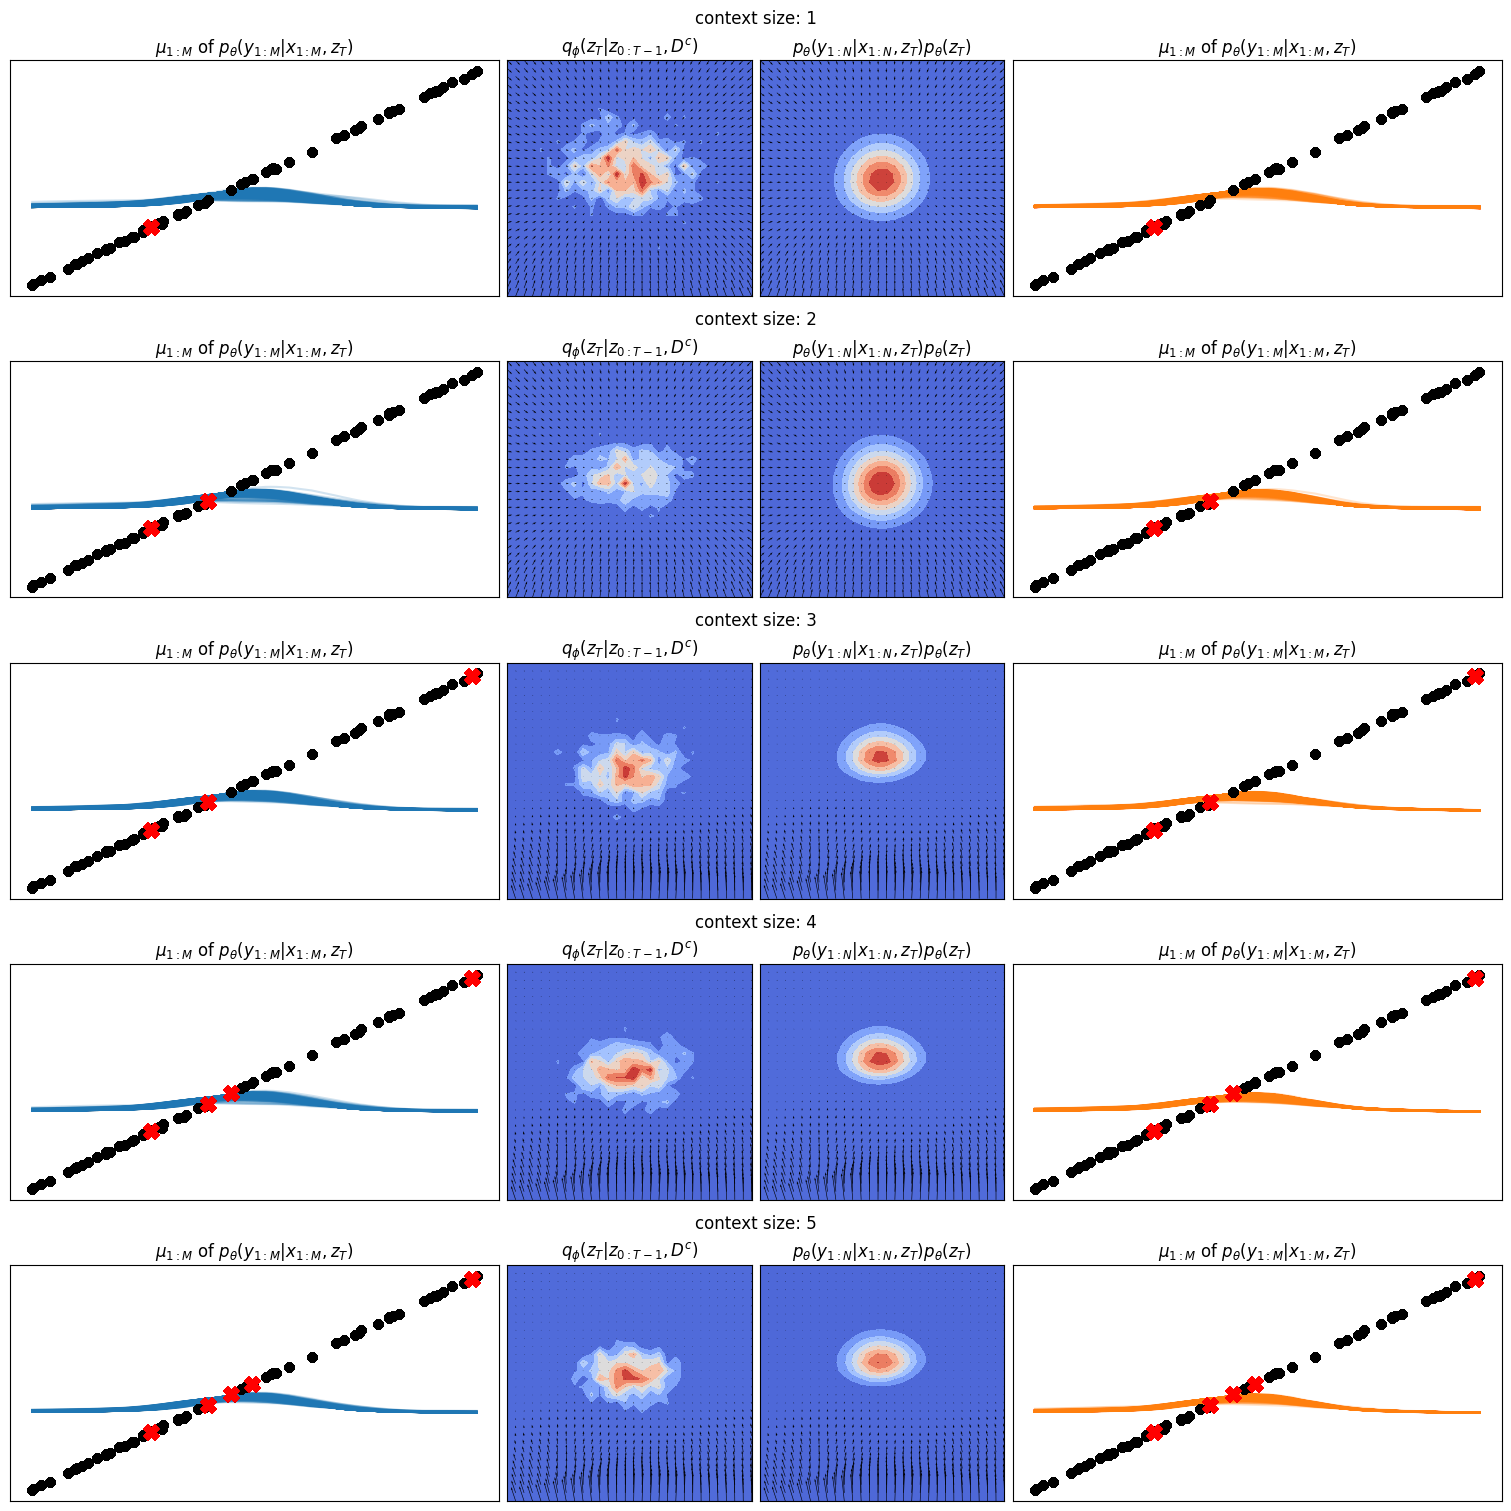

In [10]:
max_context_size = 5
num_samples = 900 # num_cells will be root

ranges = [(-5, 5), (-5, 5)]

targets, samples = visualize_dvinp_both(
    device=device,
    dvinp=dvinp,
    dataloader=test_loader,
    num_samples=num_samples,
    max_context_size=max_context_size,
    ranges=ranges,
)